In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('fivethirtyeight')

In [2]:
start_date=input("Enter the start date: ")
print()

In [4]:
end_date=input("Enter the end date: ")
print()

In [5]:
df=web.DataReader('AAPL', data_source='yahoo', start=start_date, end=end_date)

In [6]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.139946
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.785927
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.068565
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.650795
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.304413
...,...,...,...,...,...,...
2022-06-15,137.339996,132.160004,134.289993,135.429993,91533000.0,135.429993
2022-06-16,132.389999,129.039993,132.080002,130.059998,108123900.0,130.059998
2022-06-17,133.080002,129.809998,130.070007,131.559998,134118500.0,131.559998


In [7]:
df.shape

(624, 6)

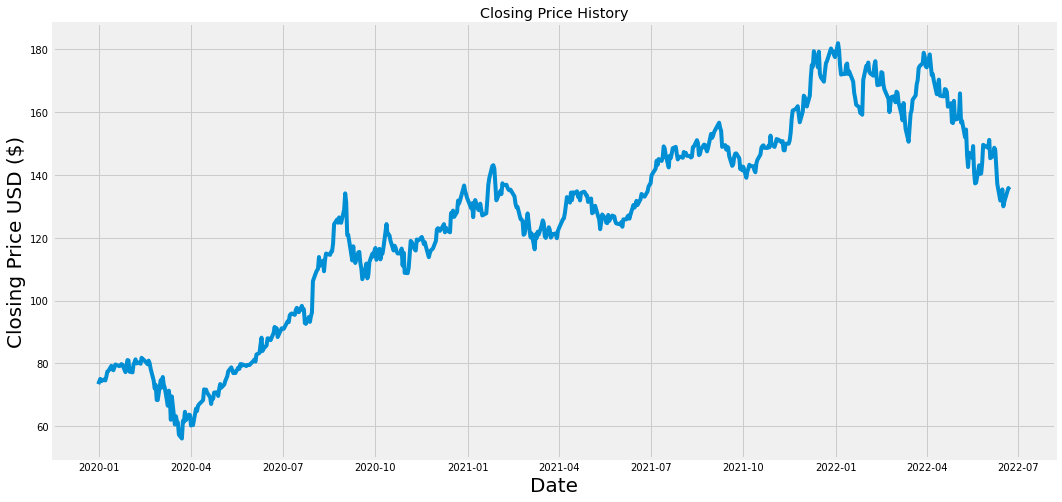

In [8]:
#Closing price plot
plt.figure(figsize=(16,8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Price USD ($)', fontsize=20)
plt.show()

In [9]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
data=df.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

500

In [11]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.13755038],
       [0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.121

In [12]:
train_data=scaled_data[0:training_data_len, :]
x_train=[]
y_train=[]

for i in range (60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [13]:
x_train, y_train =np.array(x_train), np.array(y_train)

In [14]:
x_train =np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(440, 60, 1)

In [15]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [16]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

440/440 [==============================] - 11s 19ms/step - loss: 0.0040


In [18]:
test_data=scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [19]:
x_test=np.array(x_test)

In [20]:
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [21]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

4/4 [==============================] - 1s 9ms/step


In [23]:
rmse =np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

7.28560748772802

C:\Users\Shrikant\AppData\Local\Temp\ipykernel_9436\1598067240.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


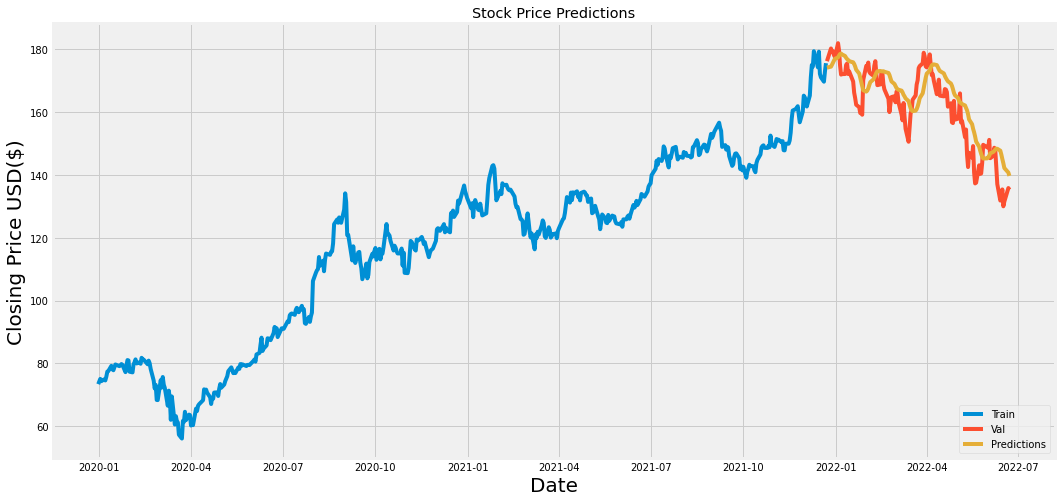

In [25]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Stock Price Predictions')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Closing Price USD($)', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.ion()
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2019-03-28,47.180000,48.225555
2019-03-29,47.487499,48.230080
2019-04-01,47.810001,48.241577
2019-04-02,48.505001,48.287914
2019-04-03,48.837502,48.419476
...,...,...
2021-04-30,131.460007,132.295883
2021-05-03,132.539993,131.958176
2021-05-04,127.849998,131.658432


In [26]:
apple_quote=web.DataReader('AAPL', data_source='yahoo', start=start_date, end=end_date)
new_df=apple_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 20ms/step
[[138.9379]]


In [27]:
apple_quote2=web.DataReader('AAPL', data_source='yahoo', start='2021-05-07', end='2021-05-07')
print(apple_quote2['Close'])

Date
2021-05-06    129.740005
2021-05-07    130.210007
Name: Close, dtype: float64
